[Cours](https://learn.deeplearning.ai/langchain/lesson/3/memory)

Dans ce cours on apprend à recourir aux différentes librairies sur la mémorisation des conversions effectuées

Date : 08-12-23

## Aperçu avec les librairies suivantes sur la mémorisation des conversations :
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory

## 1ère librairie : ConversationBufferMemory

In [1]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

import warnings
warnings.filterwarnings('ignore')

In [2]:
llm_model = 'gpt-3.5-turbo'

In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [4]:
llm = ChatOpenAI(temperature=0.0, model=llm_model)

memory = ConversationBufferMemory()

conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [5]:
conversation.predict(input="Hi, my name is Andrew")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Andrew
AI:

> Finished chain.


"Hello Andrew! It's nice to meet you. How can I assist you today?"

In [6]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'1+1 is equal to 2.'

In [7]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI: 1+1 is equal to 2.
Human: What is my name?
AI:

> Finished chain.


'Your name is Andrew.'

In [8]:
print(memory.buffer)

Human: Hi, my name is Andrew
AI: Hello Andrew! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI: 1+1 is equal to 2.
Human: What is my name?
AI: Your name is Andrew.


In [9]:
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Andrew\nAI: Hello Andrew! It's nice to meet you. How can I assist you today?\nHuman: What is 1+1?\nAI: 1+1 is equal to 2.\nHuman: What is my name?\nAI: Your name is Andrew."}

In [10]:
# Réinitialisation
memory = ConversationBufferMemory()

In [11]:
# 1ère "sauvegarde"
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})

In [12]:
print(memory.buffer)

Human: Hi
AI: What's up


In [13]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [14]:
# 2ème "sauvegarde"
memory.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})

In [15]:
# Récupération de toutes les "sauvegardes"
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

## 2ème librairie : ConversationBufferWindowMemory

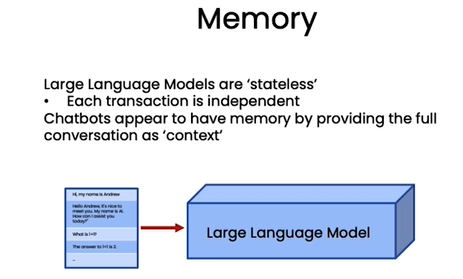

In [16]:
from langchain.memory import ConversationBufferWindowMemory

In [17]:
memory = ConversationBufferWindowMemory(k=1)

In [18]:
# 1ère "sauvegarde"
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
# 2ème "sauvegarde"
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})

In [19]:
# Seules données conservées : la dernière "sauvegarde" (2ème "sauvegarde")
memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [20]:
llm = ChatOpenAI(temperature=0.0, model=llm_model)

memory = ConversationBufferWindowMemory(k=1)

conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=False
)

In [21]:
conversation.predict(input="Hi, my name is Andrew")

"Hello Andrew! It's nice to meet you. How can I assist you today?"

In [22]:
conversation.predict(input="What is 1+1?")

'1+1 is equal to 2.'

In [23]:
# Le gros blaireau ! il se rappelle plus de mon nom 🤣🤣🤣
conversation.predict(input="What is my name?")

"I'm sorry, but I don't have access to personal information about individuals unless it has been shared with me in the course of our conversation."

## 3ème librairie : ConversationTokenBufferMemory

Cette librairie limite le nombre de token (jetons)

In [25]:
# %pip install tiktoken

In [35]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0, model=llm_model)

In [36]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=5)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [37]:
memory.load_memory_variables({})

{'history': ''}

## 4ème librairie : ConversationSummaryMemory

Cette librairie limite le nombre de token et résume les conversations

In [29]:
from langchain.memory import ConversationSummaryBufferMemory

In [30]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

In [31]:
memory.load_memory_variables({})

{'history': 'System: The human and AI exchange greetings. The human asks about the schedule for the day. The AI provides a detailed schedule, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI emphasizes the importance of bringing a laptop to showcase the latest LLM demo during the lunch meeting.'}

In [32]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [33]:
conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human and AI exchange greetings. The human asks about the schedule for the day. The AI provides a detailed schedule, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI emphasizes the importance of bringing a laptop to showcase the latest LLM demo during the lunch meeting.
Human: What would be a good demo to show?
AI:

> Finished chain.


"A good demo to show during the lunch meeting with the customer interested in AI would be the latest LLM (Language Model) demo. The LLM is a cutting-edge AI model that can generate human-like text based on a given prompt. It has been trained on a vast amount of data and can generate coherent and contextually relevant responses. By showcasing the LLM demo, you can demonstrate the capabilities of AI in natural language processing and generate interest in potential applications for the customer's business."

In [34]:
memory.load_memory_variables({})

{'history': "System: The human and AI exchange greetings and discuss the schedule for the day. The AI provides a detailed schedule, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI emphasizes the importance of bringing a laptop to showcase the latest LLM demo during the lunch meeting. The human asks what would be a good demo to show, and the AI suggests showcasing the latest LLM (Language Model) demo. The LLM is a cutting-edge AI model that can generate human-like text based on a given prompt. By showcasing the LLM demo, the AI can demonstrate the capabilities of AI in natural language processing and generate interest in potential applications for the customer's business."}